# **Text cleaning**

In [ ]:
!pip install contractions

In [ ]:
import nltk
import inflect
import contractions
from bs4 import BeautifulSoup
import re, string, unicodedata
from nltk.corpus import stopwords
from nltk import word_tokenize, sent_tokenize
from nltk.stem import LancasterStemmer, WordNetLemmatizer

In [ ]:
data = """This movie made it into one of my top 10 most awful movies. Horrible. <br /><br />There wasn't a continuous minute where there wasn't a fight with one monster or another. There was no chance for any character development, they were too busy running from one sword fight to another. I had no emotional attachment (except to the big bad machine that wanted to destroy them) <br /><br />Scenes were blatantly stolen from other movies, LOTR, Star Wars and Matrix. <br /><br />Examples<br /><br />>The ghost scene at the end was stolen from the final scene of the old Star Wars with Yoda, Obee One and Vader. <br /><br />>The spider machine in the beginning was exactly like Frodo being attacked by the spider in Return of the Kings https://twitter.com/. (Elijah Wood is the victim in both films) and wait......it hypnotizes (stings) its victim and wraps them up.....uh hello????<br /><br />>And the whole machine vs. humans theme WAS the Matrix..or Terminator.....<br /><br />There are more examples but why waste the time? And will someone tell me what was with the Nazi's?!?! Nazi's???? <br /><br />There was a juvenile story line rushed to a juvenile conclusion. The movie could not decide if it was a children's movie or an adult movie and wasn't much of either. <br /><br />Just awful. A real disappointment to say the least. Save your money."""

In [ ]:
data


"This movie made it into one of my top 10 most awful movies. Horrible. <br /><br />There wasn't a continuous minute where there wasn't a fight with one monster or another. There was no chance for any character development, they were too busy running from one sword fight to another. I had no emotional attachment (except to the big bad machine that wanted to destroy them) <br /><br />Scenes were blatantly stolen from other movies, LOTR, Star Wars and Matrix. <br /><br />Examples<br /><br />>The ghost scene at the end was stolen from the final scene of the old Star Wars with Yoda, Obee One and Vader. <br /><br />>The spider machine in the beginning was exactly like Frodo being attacked by the spider in Return of the Kings https://twitter.com/. (Elijah Wood is the victim in both films) and wait......it hypnotizes (stings) its victim and wraps them up.....uh hello????<br /><br />>And the whole machine vs. humans theme WAS the Matrix..or Terminator.....<br /><br />There are more examples but

In [ ]:
# Remove HTML tag

def html_remover(data):
  beauti = BeautifulSoup(data, 'html.parser')
  return beauti.get_text()

def url_remover(data):
  return re.sub(r'https\S', '', data)

def web_associated(data):
  text = html_remover(data)
  text = url_remover(text)
  return text

new_data = web_associated(data)

In [ ]:
new_data

"This movie made it into one of my top 10 most awful movies. Horrible. There wasn't a continuous minute where there wasn't a fight with one monster or another. There was no chance for any character development, they were too busy running from one sword fight to another. I had no emotional attachment (except to the big bad machine that wanted to destroy them) Scenes were blatantly stolen from other movies, LOTR, Star Wars and Matrix. Examples>The ghost scene at the end was stolen from the final scene of the old Star Wars with Yoda, Obee One and Vader. >The spider machine in the beginning was exactly like Frodo being attacked by the spider in Return of the Kings //twitter.com/. (Elijah Wood is the victim in both films) and wait......it hypnotizes (stings) its victim and wraps them up.....uh hello????>And the whole machine vs. humans theme WAS the Matrix..or Terminator.....There are more examples but why waste the time? And will someone tell me what was with the Nazi's?!?! Nazi's???? Ther

In [ ]:
def remove_round_brackets(data):
  return re.sub('\(.*?\)', '', data)

def remove_punc(data):
  trans = str.maketrans('', '', string.punctuation)
  return data.translate(trans)

def white_space(data):
  return ' '.join(data.split())

def complete_noise(data):
  new_data = remove_round_brackets(data)
  new_data = remove_punc(new_data)
  new_data = white_space(new_data)
  return new_data

new_data = complete_noise(new_data)

In [ ]:
new_data

'This movie made it into one of my top 10 most awful movies Horrible There wasnt a continuous minute where there wasnt a fight with one monster or another There was no chance for any character development they were too busy running from one sword fight to another I had no emotional attachment Scenes were blatantly stolen from other movies LOTR Star Wars and Matrix ExamplesThe ghost scene at the end was stolen from the final scene of the old Star Wars with Yoda Obee One and Vader The spider machine in the beginning was exactly like Frodo being attacked by the spider in Return of the Kings twittercom and waitit hypnotizes its victim and wraps them upuh helloAnd the whole machine vs humans theme WAS the Matrixor TerminatorThere are more examples but why waste the time And will someone tell me what was with the Nazis Nazis There was a juvenile story line rushed to a juvenile conclusion The movie could not decide if it was a childrens movie or an adult movie and wasnt much of either Just aw

In [ ]:
def text_lower(data):
  return data.lower()

def contraction_replace(data):
  return contractions.fix(data)

def number_to_text(data):
  temp_str = data.split()
  string = []
  for i in temp_str:
    if i.isdigit():
      temp = inflect.engine().number_to_words(i)
      string.append(temp)
    else:
      string.append(i)
  temp_str = ' '.join(string)
  return temp_str

def normalization(data):
  text = text_lower(data)
  text = number_to_text(text)
  text = contraction_replace(text)
  nltk.download('punkt')
  tokens = nltk.word_tokenize(text)
  return tokens

tokens = normalization(new_data)
print(tokens)


['this', 'movie', 'made', 'it', 'into', 'one', 'of', 'my', 'top', 'ten', 'most', 'awful', 'movies', 'horrible', 'there', 'was', 'not', 'a', 'continuous', 'minute', 'where', 'there', 'was', 'not', 'a', 'fight', 'with', 'one', 'monster', 'or', 'another', 'there', 'was', 'no', 'chance', 'for', 'any', 'character', 'development', 'they', 'were', 'too', 'busy', 'running', 'from', 'one', 'sword', 'fight', 'to', 'another', 'i', 'had', 'no', 'emotional', 'attachment', 'scenes', 'were', 'blatantly', 'stolen', 'from', 'other', 'movies', 'lotr', 'star', 'wars', 'and', 'matrix', 'examplesthe', 'ghost', 'scene', 'at', 'the', 'end', 'was', 'stolen', 'from', 'the', 'final', 'scene', 'of', 'the', 'old', 'star', 'wars', 'with', 'yoda', 'obee', 'one', 'and', 'vader', 'the', 'spider', 'machine', 'in', 'the', 'beginning', 'was', 'exactly', 'like', 'frodo', 'being', 'attacked', 'by', 'the', 'spider', 'in', 'return', 'of', 'the', 'kings', 'twittercom', 'and', 'waitit', 'hypnotizes', 'its', 'victim', 'and', '

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
def stopword(data):
  nltk.download('stopwords')
  clean = []
  for i in data:
    if i not in stopwords.words('english'):
      clean.append(i)
  return clean

def stemming(data):
  stemmer = LancasterStemmer()
  stemmed = []
  for i in data:
    stem = stemmer.stem(i)
    stemmed.append(stem)
  return stemmed

def lemmatization(data):
  nltk.download('wordnet')
  lemma = WordNetLemmatizer()
  lemmas = []
  for i in data:
    lem = lemma.lemmatize(i, pos = 'v')
    lemmas.append(lem)
  return lemmas

def final_process(data):
  stopwords_remove = stopword(data)
  stemmed = stemming(stopwords_remove)
  lemm = lemmatization(stopwords_remove)
  return stemmed, lemm

stem, lemmas = final_process(tokens)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
stem

['movy',
 'mad',
 'on',
 'top',
 'ten',
 'aw',
 'movy',
 'horr',
 'continu',
 'minut',
 'fight',
 'on',
 'monst',
 'anoth',
 'chant',
 'charact',
 'develop',
 'busy',
 'run',
 'on',
 'sword',
 'fight',
 'anoth',
 'emot',
 'attach',
 'scen',
 'blat',
 'stol',
 'movy',
 'lot',
 'star',
 'war',
 'matrix',
 'examplesth',
 'ghost',
 'scen',
 'end',
 'stol',
 'fin',
 'scen',
 'old',
 'star',
 'war',
 'yod',
 'ob',
 'on',
 'vad',
 'spid',
 'machin',
 'begin',
 'exact',
 'lik',
 'frodo',
 'attack',
 'spid',
 'return',
 'king',
 'twittercom',
 'waitit',
 'hypnot',
 'victim',
 'wrap',
 'upuh',
 'helloand',
 'whol',
 'machin',
 'vs',
 'hum',
 'them',
 'matrix',
 'terminatorth',
 'exampl',
 'wast',
 'tim',
 'someon',
 'tel',
 'naz',
 'naz',
 'juvenil',
 'story',
 'lin',
 'rush',
 'juvenil',
 'conclud',
 'movy',
 'could',
 'decid',
 'childr',
 'movy',
 'adult',
 'movy',
 'much',
 'eith',
 'aw',
 'real',
 'disappoint',
 'say',
 'least',
 'sav',
 'money']

In [ ]:
lemmas

['movie',
 'make',
 'one',
 'top',
 'ten',
 'awful',
 'movies',
 'horrible',
 'continuous',
 'minute',
 'fight',
 'one',
 'monster',
 'another',
 'chance',
 'character',
 'development',
 'busy',
 'run',
 'one',
 'sword',
 'fight',
 'another',
 'emotional',
 'attachment',
 'scenes',
 'blatantly',
 'steal',
 'movies',
 'lotr',
 'star',
 'war',
 'matrix',
 'examplesthe',
 'ghost',
 'scene',
 'end',
 'steal',
 'final',
 'scene',
 'old',
 'star',
 'war',
 'yoda',
 'obee',
 'one',
 'vader',
 'spider',
 'machine',
 'begin',
 'exactly',
 'like',
 'frodo',
 'attack',
 'spider',
 'return',
 'kings',
 'twittercom',
 'waitit',
 'hypnotize',
 'victim',
 'wrap',
 'upuh',
 'helloand',
 'whole',
 'machine',
 'vs',
 'humans',
 'theme',
 'matrixor',
 'terminatorthere',
 'examples',
 'waste',
 'time',
 'someone',
 'tell',
 'nazis',
 'nazis',
 'juvenile',
 'story',
 'line',
 'rush',
 'juvenile',
 'conclusion',
 'movie',
 'could',
 'decide',
 'childrens',
 'movie',
 'adult',
 'movie',
 'much',
 'either',
 

# **Text classification in a dataset**



1.   Load and explore dataset



In [ ]:
import warnings
warnings.filterwarnings('ignore')
import re, string
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.feature_extraction import _stop_words
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score

# To track the training duration
import itertools
from time import time

In [ ]:
### We can use this code to find out certain encodings

# import chardet

# raw_data = open('/content/US-Economic-News.csv', 'rb').read()
# result = chardet.detect(raw_data)
# char_enc = result['encoding']
# print(char_enc)

In [ ]:
data2 = pd.read_csv('/content/US-Economic-News.csv', encoding = 'MacRoman')
data2.head()


,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,positivity,positivity:confidence,relevance,relevance:confidence,articleid,date,headline,positivity_gold,relevance_gold,text
0,842613455,False,finalized,3,12/5/15 17:48,3.0,0.6400,yes,0.640,wsj_398217788,8/14/91,Yields on CDs Fell in the Latest Week,NaN,NaN,NEW YORK -- Yields on most certificates of dep...
1,842613456,False,finalized,3,12/5/15 16:54,NaN,NaN,no,1.000,wsj_399019502,8/21/07,The Morning Brief: White House Seeks to Limit ...,NaN,NaN,The Wall Street Journal Online</br></br>The Mo...
2,842613457,False,finalized,3,12/5/15 1:59,NaN,NaN,no,1.000,wsj_398284048,11/14/91,Banking Bill Negotiators Set Compromise --- Pl...,NaN,NaN,WASHINGTON -- In an effort to achieve banking ...
3,842613458,False,finalized,3,12/5/15 2:19,NaN,0.0000,no,0.675,wsj_397959018,6/16/86,Manager's Journal: Sniffing Out Drug Abusers I...,NaN,NaN,The statistics on the enormous costs of employ...
4,842613459,False,finalized,3,12/5/15 17:48,3.0,0.3257,yes,0.640,wsj_398838054,10/4/02,Currency Trading: Dollar Remains in Tight Rang...,NaN,NaN,NEW YORK -- Indecision marked the dollar's ton...


In [ ]:
data2.shape

(8000, 15)

In [ ]:
data2['relevance'].value_counts()

no          6571
yes         1420
not sure       9
Name: relevance, dtype: int64



*   There is an imbalance in the data with not relevant being 82% in the dataset. That is, most of the articles are not relevant to US Economy, which makes sense in a real-world scenario, as news articles discuss various topics. We should keep this class imbalance mind when interpreting the classifier performance later.
*   First, it would be useful to convert the class labels into binary outcome variables, for convenience. 1 for Yes (relevant), 0 for No (not relevant), and ignore "Not sure".



In [ ]:
data2 = data2[data2.relevance != "not sure"]
data2.shape


(7991, 15)

In [ ]:
data2['relevance'].value_counts()

no     6571
yes    1420
Name: relevance, dtype: int64

In [ ]:
data2['relevance'] = data2['relevance'].map({'yes':1, 'no':0})

In [ ]:
# Let's take only two columns

data2 = data2[['text', 'relevance']]
data2.shape

(7991, 2)

In [ ]:
data2.head()

,text,relevance
0,NEW YORK -- Yields on most certificates of dep...,1
1,The Wall Street Journal Online</br></br>The Mo...,0
2,WASHINGTON -- In an effort to achieve banking ...,0
3,The statistics on the enormous costs of employ...,0
4,NEW YORK -- Indecision marked the dollar's ton...,1


2.   Text preprocessing

In [ ]:
stopwords = _stop_words.ENGLISH_STOP_WORDS
def clean(text1): # text1 is a string of text
    text1 = text1.replace("</br>", " ") # removing tags
    text1 = "".join([char for char in text1 if char not in string.punctuation and not char.isdigit()])
    text1 = " ".join([token for token in text1.split() if token not in stopwords])
    return text1

3. Modeling

* Split the data into training and test sets;
* Extract features from the training data using CountVectorizer. We will use the pre-processing function above in conjunction with CountVectorizer;
* Transform the test data into the same feature vector as the training data;
* Train the classifier;
* Evaluate the classifier.



In [ ]:
X = data2.text
y = data2.relevance
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
print(f'X_train.shape -> {X_train.shape}, y_train.shape -> {y_train.shape}')
print(f'X_test.hape -> {X_test.shape}, y_test.hape -> {y_test.shape}')

(7991,) (7991,)
X_train.shape -> (5993,), y_train.shape -> (5993,)
X_test.hape -> (1998,), y_test.hape -> (1998,)


In [ ]:
vector = CountVectorizer(preprocessor = clean)

X_train_dtm = vector.fit_transform(X_train)
X_test_dtm = vector.transform(X_test)
print(f'X_train_dtm.shape -> {X_train_dtm.shape}')
print(f'X_test_dtm.shape -> {X_test_dtm.shape}')

X_train_dtm.shape -> (5993, 51110)
X_test_dtm.shape -> (1998, 51110)


In [ ]:
# Naive Bayes

nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)


In [ ]:
# Ploting the results for a better analyze

def plot_confusion_matrix(cm, classes, normalize = False,
                          tittle = 'Confusion Matrix', cmap = plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(tittle)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(i, j, format(cm[i, j], fmt), horizontalalignment = 'center',
        color = 'black')

    plt.tight_layout()
    plt.xlabel('Predicted label', fontsize = 15)
    plt.ylabel('True label', fontsize = 15)


In [ ]:
print('Accuracy: ', accuracy_score(y_test, y_pred_class))

Accuracy:  0.7827827827827828


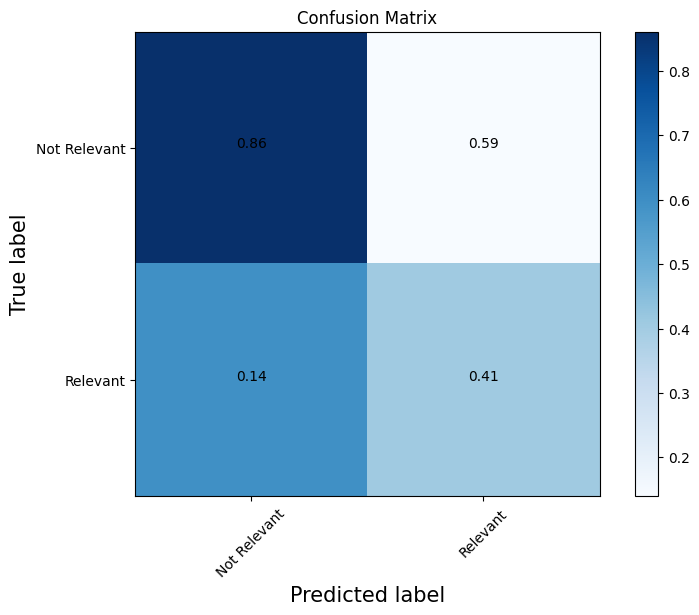

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize = (8, 6))
plot_confusion_matrix(conf_matrix, classes = ['Not Relevant', 'Relevant'],
                      normalize = True, tittle = 'Confusion Matrix')


In [ ]:
y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]
print('ROC: ', metrics.roc_auc_score(y_test, y_pred_prob))

ROC:  0.7228499237223495


CPU times: user 6.96 ms, sys: 805 µs, total: 7.77 ms
Wall time: 7.75 ms
Accuracy:  0.6881881881881882


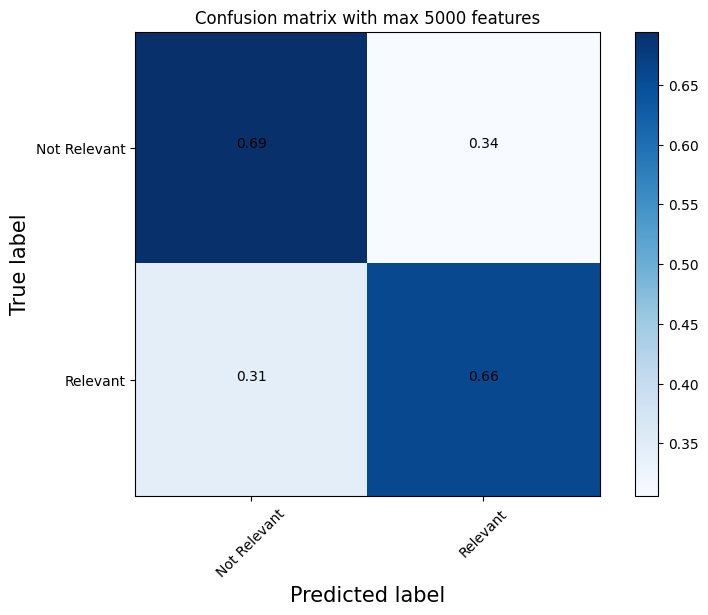

In [ ]:
# We will try to change the vectorizer to take a certain number of features as maximum

vector = CountVectorizer(preprocessor = clean, max_features = 5000)
X_train_dtm = vector.fit_transform(X_train)
X_test_dtm = vector.transform(X_test)

nb = MultinomialNB()
%time nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_class))

conf_matrix = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8,6))
plot_confusion_matrix(conf_matrix, classes = ['Not Relevant','Relevant'],normalize = True,
                      tittle = 'Confusion matrix with max 5000 features')


Reducing the feature vector size, we didn't receive a better accuracy, but we have a better balance in relation to the identification of relevant and non-relevant features, which is the point of our research.

Accuracy:  0.7427427427427428
AUC:  0.7228499237223495


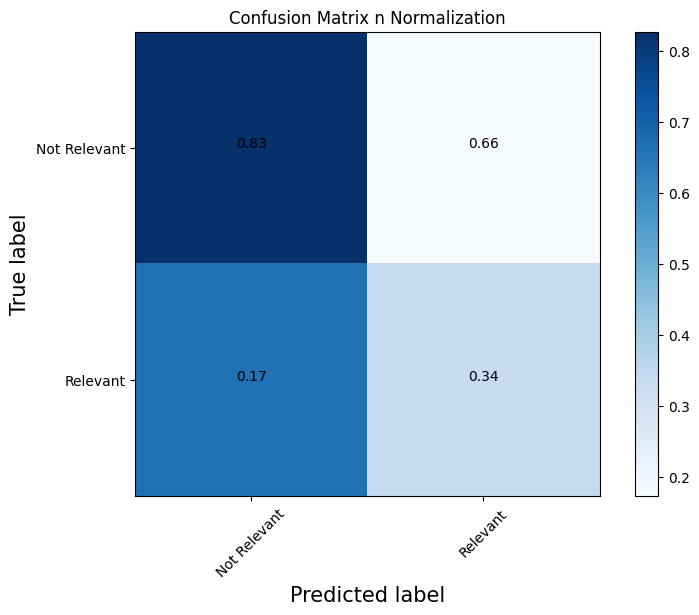

In [ ]:
# Logistic Regression

lr = LogisticRegression(class_weight = 'balanced')
lr.fit(X_train_dtm, y_train)
y_pred_class = lr.predict(X_test_dtm)

print('Accuracy: ', accuracy_score(y_test, y_pred_class))
print('AUC: ', metrics.roc_auc_score(y_test, y_pred_prob))

conf_matrix = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize = (8, 6))
plot_confusion_matrix(conf_matrix, classes = ['Not Relevant', 'Relevant'],
                      normalize = True, tittle = 'Confusion Matrix n Normalization')

Accuracy:  0.7202202202202203
ROC:  0.7228499237223495


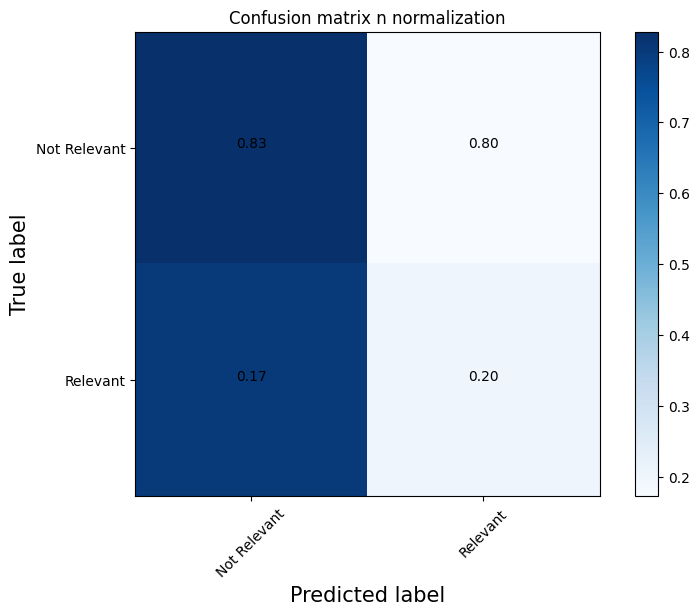

In [ ]:
# SVM Classifier

vector = CountVectorizer(preprocessor = clean, max_features = 1000)
X_train_dtm = vector.fit_transform(X_train)
X_test_dtm = vector.fit_transform(X_test)
classifier = LinearSVC(class_weight = 'balanced')
classifier.fit(X_train_dtm, y_train)
y_pred_class = classifier.predict(X_test_dtm)

print('Accuracy: ', accuracy_score(y_test, y_pred_class))
print('ROC: ', metrics.roc_auc_score(y_test, y_pred_prob))

conf_matrix = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize = (8, 6))
plot_confusion_matrix(conf_matrix, classes = ['Not Relevant', 'Relevant'],
                      normalize = True, tittle = 'Confusion matrix n normalization')
